In [67]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats

In [68]:
shot_log = pd.read_csv('data/shot_logs.csv')

In [69]:
philly_guys = shot_log[shot_log.iloc[:, 1].str.contains('PHI @|PHI vs.')]
philly_guys

,GAME_ID,MATCHUP,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,...,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id
71063,21400881,"MAR 01, 2015 - PHI @ IND",A,L,-20,1,1,8:12,15.8,0,...,25.0,3,missed,"West, David",2561,4.8,0,0,robert covington,203496
71064,21400881,"MAR 01, 2015 - PHI @ IND",A,L,-20,2,1,7:17,9.3,1,...,13.6,2,missed,"Rudez, Damjan",204014,4.0,0,0,robert covington,203496
71065,21400881,"MAR 01, 2015 - PHI @ IND",A,L,-20,3,2,7:28,6.2,0,...,25.2,3,missed,"Miles, CJ",101139,3.8,0,0,robert covington,203496
71066,21400881,"MAR 01, 2015 - PHI @ IND",A,L,-20,4,2,7:05,10.4,2,...,4.2,2,missed,"Hibbert, Roy",201579,2.0,0,0,robert covington,203496
71067,21400881,"MAR 01, 2015 - PHI @ IND",A,L,-20,5,2,4:20,17.1,1,...,6.9,2,made,"Scola, Luis",2449,1.3,1,2,robert covington,203496
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74771,21400005,"OCT 29, 2014 - PHI @ IND",A,L,-12,5,3,5:29,10.9,0,...,17.7,2,missed,"Hill, Solomon",203524,3.8,0,0,henry sims,203156
74772,21400005,"OCT 29, 2014 - PHI @ IND",A,L,-12,6,4,10:25,2.0,0,...,2.3,2,missed,"Mahinmi, Ian",101133,2.3,0,0,henry sims,203156
74773,21400005,"OCT 29, 2014 - PHI @ IND",A,L,-12,7,4,6:59,12.5,0,...,2.0,2,missed,"Mahinmi, Ian",101133,0.1,0,0,henry sims,203156
74774,21400005,"OCT 29, 2014 - PHI @ IND",A,L,-12,8,4,6:24,9.5,0,...,8.1,2,made,"Mahinmi, Ian",101133,2.3,1,2,henry sims,203156


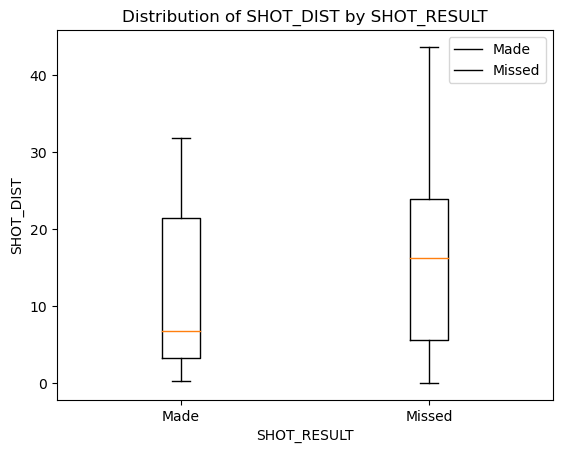

In [70]:
grouped_data = philly_guys.groupby('SHOT_RESULT')['SHOT_DIST']
data_to_plot = [grouped_data.get_group('made'), grouped_data.get_group('missed')]

fig, ax = plt.subplots()
ax.boxplot(data_to_plot)

ax.set_xticklabels(['Made', 'Missed'])
ax.set_ylabel('SHOT_DIST')
ax.set_xlabel('SHOT_RESULT')
ax.set_title('Distribution of SHOT_DIST by SHOT_RESULT')
ax.legend(['Made', 'Missed'])

plt.show()


In [71]:
group0 = philly_guys[philly_guys["SHOT_RESULT"] == 'made']["SHOT_DIST"]
group1 = philly_guys[philly_guys["SHOT_RESULT"] == 'missed']["SHOT_DIST"]
stats.f_oneway(group0, group1)

F_onewayResult(statistic=127.10830866999409, pvalue=5.25872505252666e-29)

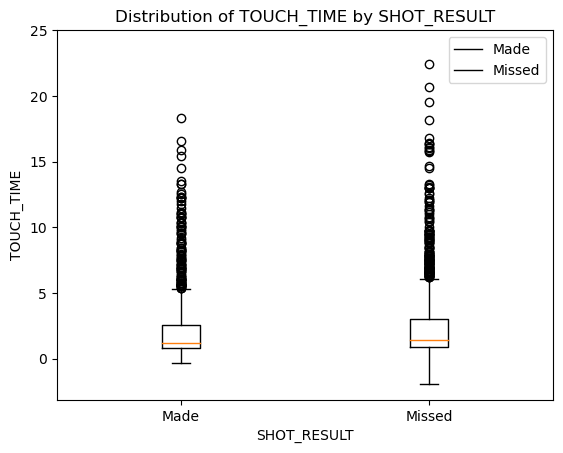

In [72]:
grouped_data = philly_guys.groupby('SHOT_RESULT')['TOUCH_TIME']
data_to_plot = [grouped_data.get_group('made'), grouped_data.get_group('missed')]

fig, ax = plt.subplots()
ax.boxplot(data_to_plot)

ax.set_xticklabels(['Made', 'Missed'])
ax.set_ylabel('TOUCH_TIME')
ax.set_xlabel('SHOT_RESULT')
ax.set_title('Distribution of TOUCH_TIME by SHOT_RESULT')
ax.legend(['Made', 'Missed'])
plt.yticks(range(0, 26, 5))  

plt.show()


In [73]:
group0 = philly_guys[philly_guys["SHOT_RESULT"] == 'made']["TOUCH_TIME"]
group1 = philly_guys[philly_guys["SHOT_RESULT"] == 'missed']["TOUCH_TIME"]
stats.f_oneway(group0, group1)

F_onewayResult(statistic=8.145625453497242, pvalue=0.004340762340931819)

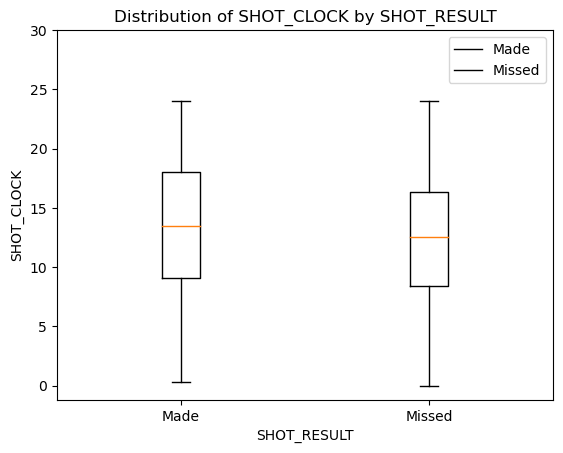

In [74]:
df_cleaned = philly_guys.dropna(subset=['SHOT_CLOCK'])
grouped_data = df_cleaned.groupby('SHOT_RESULT')['SHOT_CLOCK']
data_to_plot = [grouped_data.get_group('made'), grouped_data.get_group('missed')]

fig, ax = plt.subplots()
ax.boxplot(data_to_plot)

ax.set_xticklabels(['Made', 'Missed'])
ax.set_ylabel('SHOT_CLOCK')
ax.set_xlabel('SHOT_RESULT')
ax.set_title('Distribution of SHOT_CLOCK by SHOT_RESULT')
ax.legend(['Made', 'Missed'])
plt.yticks(range(0, 31, 5))  

plt.show()

In [75]:
group0 = df_cleaned[df_cleaned["SHOT_RESULT"] == 'made']["SHOT_CLOCK"]
group1 = df_cleaned[df_cleaned["SHOT_RESULT"] == 'missed']["SHOT_CLOCK"]
stats.f_oneway(group0, group1)

F_onewayResult(statistic=41.739922832794925, pvalue=1.1832135332005524e-10)

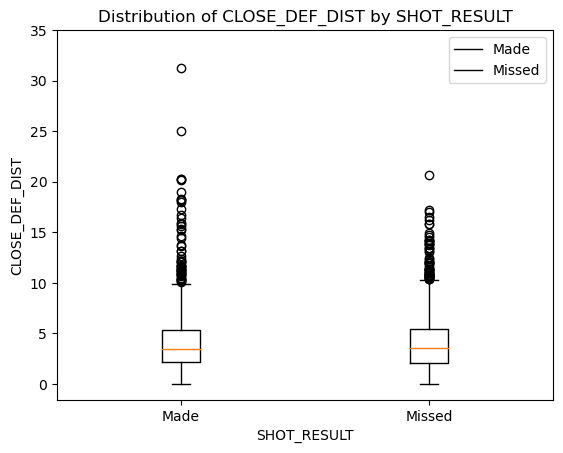

In [76]:
grouped_data = philly_guys.groupby('SHOT_RESULT')['CLOSE_DEF_DIST']
data_to_plot = [grouped_data.get_group('made'), grouped_data.get_group('missed')]

fig, ax = plt.subplots()
ax.boxplot(data_to_plot)

ax.set_xticklabels(['Made', 'Missed'])
ax.set_ylabel('CLOSE_DEF_DIST')
ax.set_xlabel('SHOT_RESULT')
ax.set_title('Distribution of CLOSE_DEF_DIST by SHOT_RESULT')
ax.legend(['Made', 'Missed'])
plt.yticks(range(0, 36, 5))  

plt.show()

In [77]:
group0 = philly_guys[philly_guys["SHOT_RESULT"] == 'made']["CLOSE_DEF_DIST"]
group1 = philly_guys[philly_guys["SHOT_RESULT"] == 'missed']["CLOSE_DEF_DIST"]
stats.f_oneway(group0, group1)

F_onewayResult(statistic=0.03799308646966689, pvalue=0.8454678354397416)